# Predicting Heart Diseases with Machine Learning

## 1. General Data Analysis


| Feature                                       | Variable Type       | Variable    | Value Type                                       |
|-----------------------------------------------|---------------------|-------------|--------------------------------------------------|
| Age                                           | Objective Feature   | age         | int (days)                                       |
| Height                                        | Objective Feature   | height      | int (cm)                                         |
| Weight                                        | Objective Feature   | weight      | float (kg)                                       |
| Gender                                        | Objective Feature   | gender      | categorical code - 1: female, 2: male                               |
| Systolic blood pressure                       | Examination Feature | ap_hi       | int                                              |
| Diastolic blood pressure                      | Examination Feature | ap_lo       | int                                              |
| Cholesterol                                   | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose                                       | Examination Feature | gluc        | 1: normal, 2: above normal, 3: well above normal |
| Smoking                                       | Subjective Feature  | smoke       | binary                                           |
| Alcohol intake                                | Subjective Feature  | alco        | binary                                           |
| Physical activity                             | Subjective Feature  | active      | binary                                           |
| Presence or absence of cardiovascular disease | Target Variable     | cardio      | binary                                           |

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_cardio = pd.read_csv("cardio_train.csv", sep=",", index_col=0)
df_cardio.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [4]:
df_cardio = df_cardio.drop(columns={'id'})
df_cardio.head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  18393       2     168    62.0    110     80            1     1      0   
1  20228       1     156    85.0    140     90            3     1      0   
2  18857       1     165    64.0    130     70            3     1      0   
3  17623       2     169    82.0    150    100            1     1      0   
4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [5]:
df_cardio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [6]:
df_cardio.describe()

age        gender        height        weight         ap_hi  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   19468.865814      1.349571    164.359229     74.205690    128.817286   
std     2467.251667      0.476838      8.210126     14.395757    154.011419   
min    10798.000000      1.000000     55.000000     10.000000   -150.000000   
25%    17664.000000      1.000000    159.000000     65.000000    120.000000   
50%    19703.000000      1.000000    165.000000     72.000000    120.000000   
75%    21327.000000      2.000000    170.000000     82.000000    140.000000   
max    23713.000000      2.000000    250.000000    200.000000  16020.000000   

              ap_lo   cholesterol          gluc         smoke          alco  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean      96.630414      1.366871      1.226457      0.088129      0.053771   
std      188.472530      0.680250      0.572270      0.283484      0.225568   
min      -70.000000      1.000000      1.000000      0.000000      0.000000   
25%       80.000000      1.000000      1.000000      0.000000      0.000000   
50%       80.000000      1.000000      1.000000      0.000000      0.000000   
75%       90.000000      2.000000      1.000000      0.000000      0.000000   
max    11000.000000      3.000000      3.000000      1.000000      1.000000   

             active        cardio  
count  70000.000000  70000.000000  
mean       0.803729      0.499700  
std        0.397179      0.500003  
min        0.000000      0.000000  
25%        1.000000      0.000000  
50%        1.000000      0.000000  
75%        1.000000      1.000000  
max        1.000000      1.000000

##### Converting Age from Days to Years

In [7]:
df_cardio['age'] = df_cardio['age'] / 365

In [8]:
df_cardio.describe()

age        gender        height        weight         ap_hi  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean      53.339358      1.349571    164.359229     74.205690    128.817286   
std        6.759594      0.476838      8.210126     14.395757    154.011419   
min       29.583562      1.000000     55.000000     10.000000   -150.000000   
25%       48.394521      1.000000    159.000000     65.000000    120.000000   
50%       53.980822      1.000000    165.000000     72.000000    120.000000   
75%       58.430137      2.000000    170.000000     82.000000    140.000000   
max       64.967123      2.000000    250.000000    200.000000  16020.000000   

              ap_lo   cholesterol          gluc         smoke          alco  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean      96.630414      1.366871      1.226457      0.088129      0.053771   
std      188.472530      0.680250      0.572270      0.283484      0.225568   
min      -70.000000      1.000000      1.000000      0.000000      0.000000   
25%       80.000000      1.000000      1.000000      0.000000      0.000000   
50%       80.000000      1.000000      1.000000      0.000000      0.000000   
75%       90.000000      2.000000      1.000000      0.000000      0.000000   
max    11000.000000      3.000000      3.000000      1.000000      1.000000   

             active        cardio  
count  70000.000000  70000.000000  
mean       0.803729      0.499700  
std        0.397179      0.500003  
min        0.000000      0.000000  
25%        1.000000      0.000000  
50%        1.000000      0.000000  
75%        1.000000      1.000000  
max        1.000000      1.000000

## 2. Exploratory Data Analysis (EDA)

### 2.1. Numerical Data

In [41]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=4, cols=1)
fig.add_trace(go.Box(x=df_cardio["age"], name="Age"), row=1, col=1)
fig.add_trace(go.Box(x=df_cardio["weight"], name="weight"), row=2, col=1)
fig.add_trace(go.Box(x=df_cardio["ap_hi"], name="Systolic blood pressure"), row=3, col=1)
fig.add_trace(go.Box(x=df_cardio["ap_lo"], name="Diastolic blood pressure"), row=4, col=1)


fig.update_layout(height=700)
fig.show()

<Axes: >

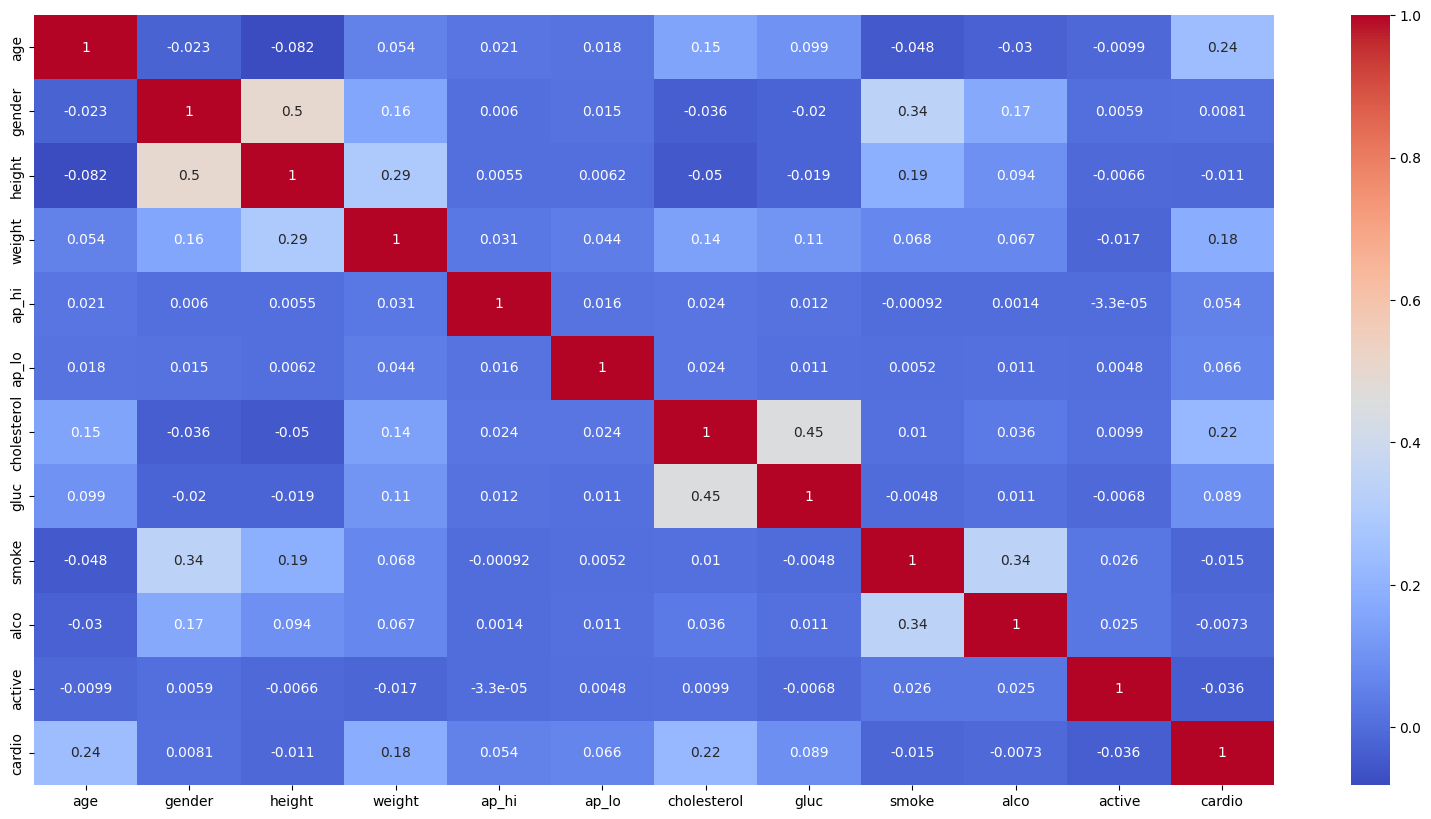

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df_cardio.select_dtypes('number').corr(), annot=True, cmap='coolwarm')

### 2.2. Categorical Data

In [11]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=2, cols=3)

fig.add_trace(go.Bar(y=df_cardio["gender"].value_counts(), x=["Female", "Male"], name="Gender"), row=1, col=1)
fig.add_trace(go.Bar(y=df_cardio["cholesterol"].value_counts(), x=["Normal", "Above Normal", "Well Above Normal"], name="Cholesterol"), row=1, col=2)
fig.add_trace(go.Bar(y=df_cardio["gluc"].value_counts(), x=["Normal", "Above Normal", "Well Above Normal"], name="Glucose"), row=1, col=3)
fig.add_trace(go.Bar(y=df_cardio["smoke"].value_counts(), x=["Non-Smoker", "Smoker"], name="Smoker"), row=2, col=1)
fig.add_trace(go.Bar(y=df_cardio["alco"].value_counts(), x=["Non-Alcoholic", "Alcoholic"], name="Alcoholic"), row=2, col=2)
fig.add_trace(go.Bar(y=df_cardio["active"].value_counts(), x=["Inactive", "Active"], name="Active"), row=2, col=3)

fig.update_layout(template="plotly_dark", height=700)
fig.show()

## 3. Machine Learning

### 3.1. Data Preparation

In [12]:
from sklearn.model_selection import train_test_split

x = df_cardio.drop(columns={'cardio'})
y = df_cardio['cardio']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

### 3.2. Model Training

#### LogisticRegression

In [13]:
from sklearn.linear_model import LogisticRegression

lg_reg = LogisticRegression()
lg_reg.fit(x, y)

C:\Users\chris\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

              precision    recall  f1-score   support

           0       0.69      0.75      0.72     10488
           1       0.72      0.66      0.69     10512

    accuracy                           0.70     21000
   macro avg       0.71      0.70      0.70     21000
weighted avg       0.71      0.70      0.70     21000



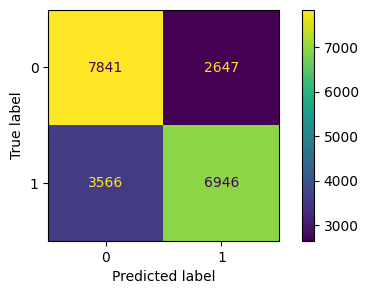

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = lg_reg.predict(x_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(6,3))
disp.plot(ax=ax)
plt.show()

#### DecisionTreeClassifier

In [15]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(x, y)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10488
           1       1.00      1.00      1.00     10512

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000



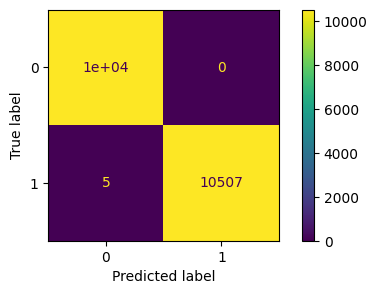

In [16]:
y_pred = tree_clf.predict(x_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(6,3))
disp.plot(ax=ax)
plt.show()

### RandomForestClassifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
forest_clf.fit(x, y)

RandomForestClassifier()

In [18]:
from sklearn.model_selection import GridSearchCV

# Definindo o grid de hiperparâmetros para busca
param_grid = [
    {'n_estimators': [3,10,30,50], 'max_features':[2, 4, 6, 8, 10, 12]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features':[2, 4, 6, 8]}
]

grid_search = GridSearchCV(
                        estimator=forest_clf, 
                        param_grid=param_grid, 
                        cv=5, 
                        return_train_score=True,
                        n_jobs=-1)  # Usar todos os núcleos disponíveis
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8, 10, 12],
                          'n_estimators': [3, 10, 30, 50]},
                         {'bootstrap': [False], 'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10]}],
             return_train_score=True)

In [19]:
results_df = pd.DataFrame(grid_search.cv_results_)
results_df = results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]

results_df = results_df.style.apply(lambda x: ["background: green" if x['rank_test_score'] == 1 else "" for _ in x], axis=1)
results_df

In [20]:
print("Best Params:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)

best_model = grid_search.best_estimator_
print("Best Model Score:", best_model.score(x_test, y_test))

Best Params: {'max_features': 4, 'n_estimators': 50}
Best Estimator: RandomForestClassifier(max_features=4, n_estimators=50)
Best Model Score: 0.7099047619047619


In [21]:
best_model.fit(x, y)

RandomForestClassifier(max_features=4, n_estimators=50)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10488
           1       1.00      1.00      1.00     10512

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000



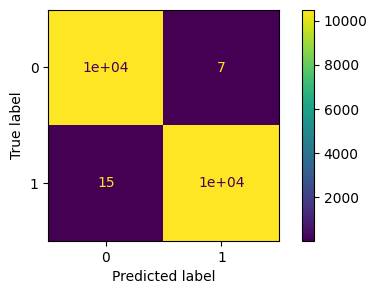

In [22]:
y_pred = best_model.predict(x_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(6,3))
disp.plot(ax=ax)
plt.show()

In [23]:
n = 4

# Select specific example to predict
random_x = x_test.iloc[n].to_frame().transpose()
random_y = y_test.loc[random_x.index].values[0]

print(f'Real value: {random_y}')

# Logistic Regression prediction
pred_proba_lg_reg = lg_reg.predict_proba(random_x)[0]
pred_lg_reg = lg_reg.predict(random_x)[0]
print(f'Predicted value by lin_reg model: {pred_lg_reg}')
print(f'Probability of being 0: {pred_proba_lg_reg[0]:.4f}')
print(f'Probability of being 1: {pred_proba_lg_reg[1]:.4f}')

# Random Forest prediction
pred_proba_forest_clf = forest_clf.predict_proba(random_x)[0]
pred_forest_clf = forest_clf.predict(random_x)[0]
print(f'Predicted value by forest_clf model: {pred_forest_clf}')
print(f'Probability of being 0: {pred_proba_forest_clf[0]:.4f}')
print(f'Probability of being 1: {pred_proba_forest_clf[1]:.4f}')

# Best Random Forest prediction
pred_proba_best_forest_clf = best_model.predict_proba(random_x)[0]
pred_best_forest_clf = best_model.predict(random_x)[0]
print(f'Predicted value by best_forest_clf model: {pred_best_forest_clf}')
print(f'Probability of being 0: {pred_proba_best_forest_clf[0]:.4f}')
print(f'Probability of being 1: {pred_proba_best_forest_clf[1]:.4f}')

Real value: 0
Predicted value by lin_reg model: 1
Probability of being 0: 0.4313
Probability of being 1: 0.5687
Predicted value by forest_clf model: 0
Probability of being 0: 0.9000
Probability of being 1: 0.1000
Predicted value by best_forest_clf model: 0
Probability of being 0: 0.8600
Probability of being 1: 0.1400


### 3.4. Feature importance

<Axes: >

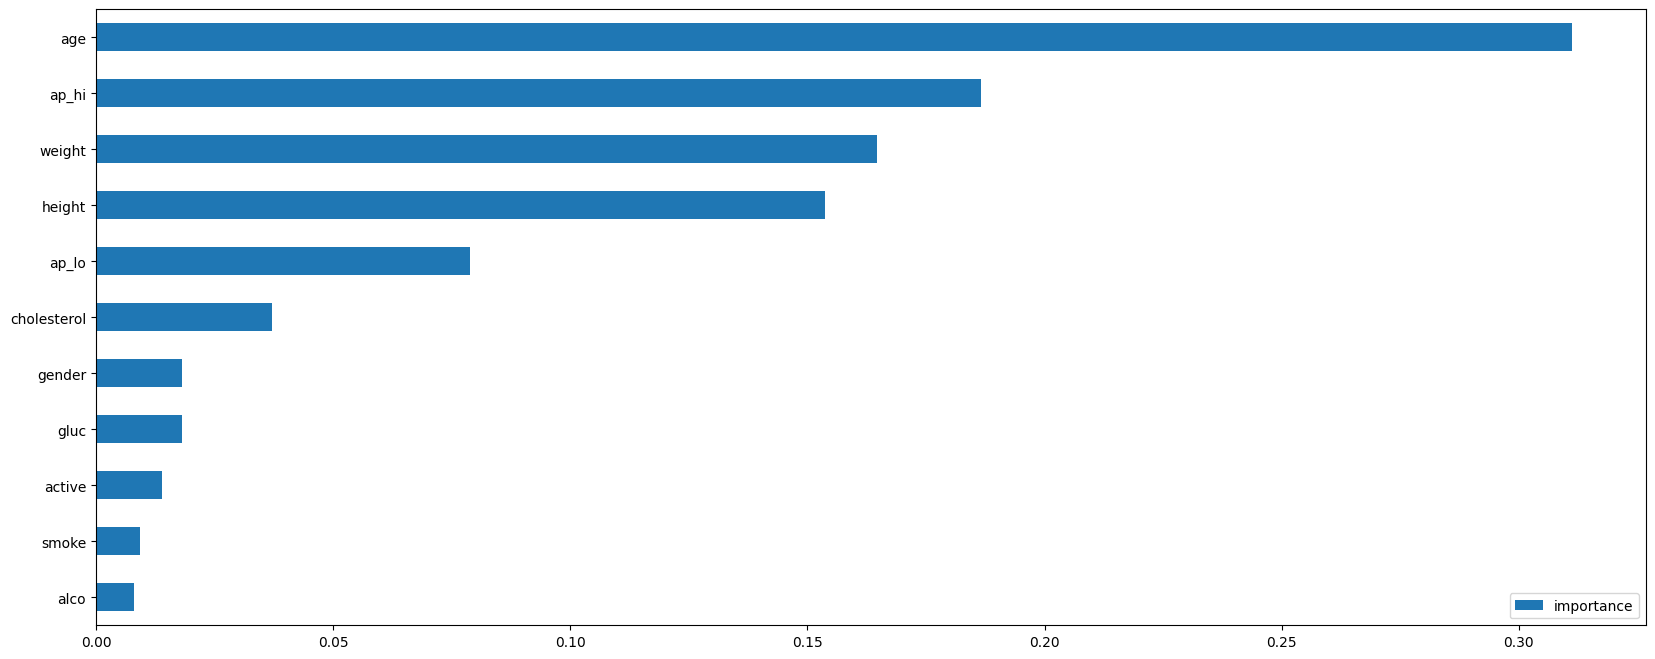

In [24]:
features_importance = pd.DataFrame(best_model.feature_importances_, 
             index=x.columns, 
             columns=['importance']).sort_values('importance',ascending=True)

fig, ax = plt.subplots(figsize=(20,8))
features_importance.plot(kind='barh', ax=ax)

#### Tree Explainer

##### Parallelizing SHAP value calculation and using a smaller sample size to reduce execution time


C:\Users\chris\AppData\Roaming\Python\Python312\site-packages\numpy\core\fromnumeric.py:59: FutureWarning:

'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.



(1000, 11)


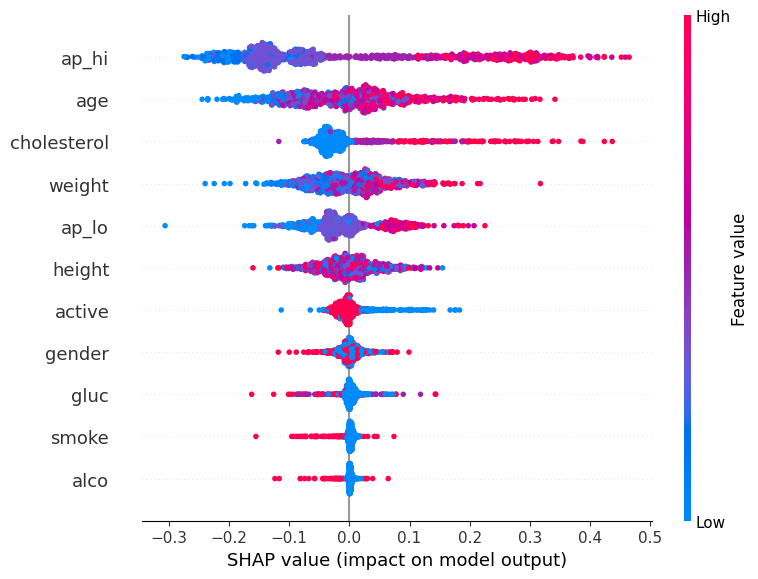

In [29]:
from joblib import Parallel, delayed
import multiprocessing
import shap

explainer = shap.TreeExplainer(best_model)
x_sampled = x.sample(n=1000, random_state=42)

def calculate_shap_values(data):
    return explainer.shap_values(data)

n_jobs = multiprocessing.cpu_count()  
x_split = np.array_split(x_sampled, n_jobs)

# Calculating SHAP Values in Parallel
shap_values_split = Parallel(n_jobs=n_jobs)(delayed(calculate_shap_values)(x_part) for x_part in x_split)
shap_values = np.concatenate(shap_values_split, axis=0)[:,:,1]
print(shap_values.shape)
shap.summary_plot(shap_values, x_sampled)

In [37]:
shap.initjs()

force_plot = shap.force_plot(explainer.expected_value[1], shap_values[1], x_train.iloc[0], plot_cmap="DrDb")
force_plot


### Save shap force plot and model to use in API

In [40]:
shap.save_html('../assets/shap_force_plot.html', force_plot)

In [28]:
import pickle

with open('random_forest_regressor.pkl', 'wb') as file:
    pickle.dump(best_model, file)